# Linear Regression using Batch Gradient Descent

## Libraries and Settings

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
assert sklearn.__version__ >= "0.20"

# To make this notebook's output stable across runs
### np.random is a module in numpy that allows us to generate random numbers
### seed() is a method that initializes the random number generator. 42 is the seed value. 
### this line doesnt generate random numbers, it just initializes the random number generator!!!!!
np.random.seed(42)

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/Linear_Regression


# Linear regression Do-It-Yourself

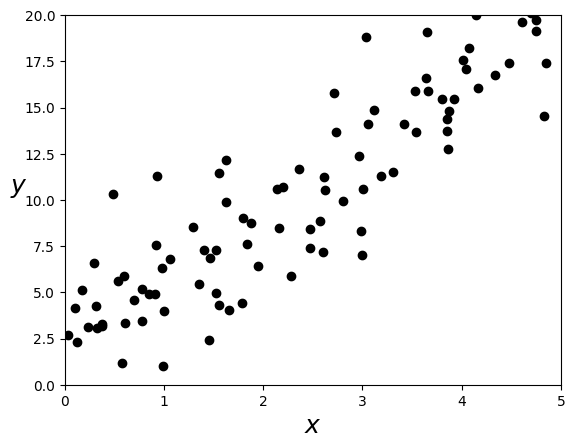

In [ ]:
    ### X is a 2D array with 100 rows and 1 column. The 'times 5' component scales the random numbers to be between 0 and 5.
    ### by default 'np.randdom.rand()' gives out only random positive numbers between 0 and 1. 
X = 5 * np.random.rand(100, 1) 
    ### 1+4*X is the linear relationship between X and y. 3*np.random.randn(100, 1) is the noise added to the linear relationship.
y = 1 + 4 * X + 3*np.random.randn(100, 1)

    ### note that X is capitalised any y is lowercase
plt.scatter(X, y, color = 'black')
    ### the $ signs are used to render the text in LaTeX-formatting. 
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
    ### 0-5 is the range of the x-axis and 0-20 is the range of the y-axis
plt.axis([0, 5, 0, 20])
plt.show()

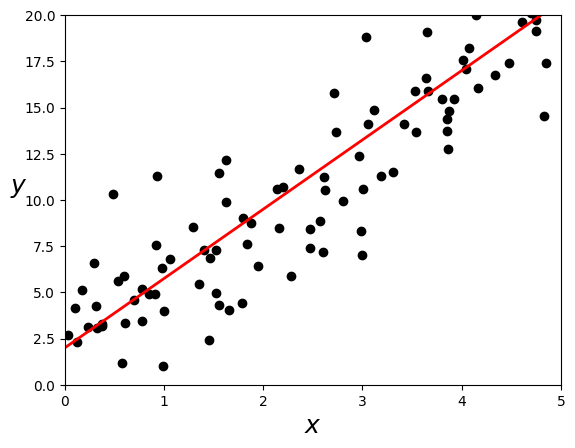

In [ ]:
# Sample data
### np.linespace generates an array of evenly spaced numbers over a specified interval: start, stop, number of samples
x_new = np.linspace(0, 5, 100)

# Make a guess for theta_0 and theta_1
    ### theta_0 seems to be the y-intercept and theta_1 seems to be the slope
theta_0 = 2.0 # Please make a better guess for theta_0
theta_1 = 3.75 # Please make a better guess for theta_1

y_hyp =  + theta_0 + theta_1 * x_new

# Plot data an guess of theta_1 & theta_0
plt.scatter(X, y, color = 'black' )
plt.plot(x_new, y_hyp, color = 'red', lw = 2)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()


# Search for optimal values of theta_0 und theta_1 using batch gradient descent

In [ ]:
### gradient descent is a learning method that starts with random values and iteratively updates the values to minimize the cost (error) function

# Learning rate
    ### QUESTION: what is the learning rate?
eta = 0.1

# Number of iterations
n_iterations = 1000

# Number of samples
    ### QUESTION: What is this?
N = 100

# Random initialization of theta_1 and theta_0
theta_1 = np.random.randn(1)
theta_0 = np.random.randn(1)

# Lists to store the values of theta_1 and theta_0 during the iterations
cum_theta1=[]
cum_theta0=[]

# Gradient Descent
for iteration in range(n_iterations):
    cum_theta0.append(theta_0)
    cum_theta1.append(theta_1)
    
    # Compute the gradients
    gradient_theta_0 = 1/N * np.sum((theta_1*X + theta_0 - y))
    gradient_theta_1 = 1/N * np.sum((theta_1*X + theta_0 - y)*X)

    # Update theta_0 and theta_1
    theta_0 = theta_0 - eta * gradient_theta_0
    theta_1 = theta_1 - eta * gradient_theta_1

# Plot the values of theta_1 and theta_0
print("theta_0: ", theta_0)
print("theta_1: ", theta_1)

theta_0:  [1.64528847]
theta_1:  [3.72413606]


## Plot the values of theta_1 and theta_0 for each iteration

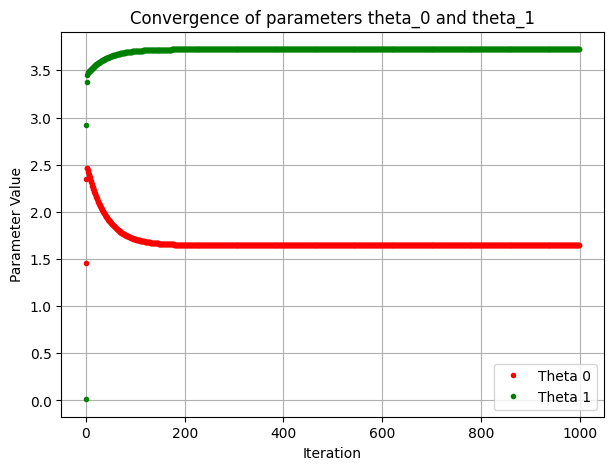

In [12]:
# Plot the values of theta_1 and theta_0
plt.figure(figsize=(7, 5))
plt.plot(cum_theta0, 'r.', label='Theta 0')
plt.plot(cum_theta1, 'g.', label='Theta 1')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Convergence of parameters theta_0 and theta_1')
plt.legend()
plt.grid()
plt.show()

# Calculate values for theta_0 und theta_1 using linear regression

In [ ]:
    ### this method is wayyyy faster than the gradient descent method, at least in terms of the number of lines of code.


# Calculate values for theta_0 und theta_1 using linear regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print values for theta_0 und theta_1
print("theta_0: ", lin_reg.intercept_)
print("theta_1: ", lin_reg.coef_)

theta_0:  [1.64528847]
theta_1:  [[3.72413606]]


## Performing a prediction using a linear regression model

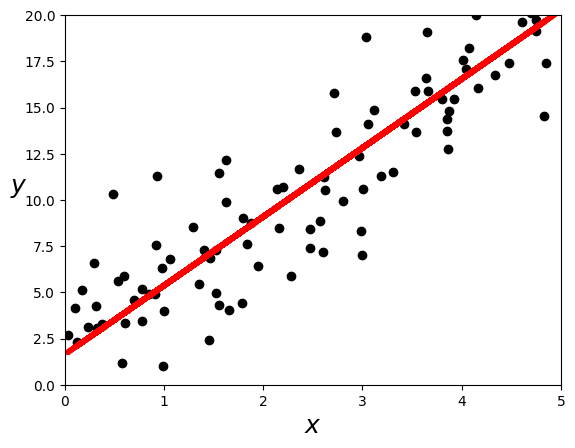

In [14]:
# Performing a prediction using a linear regression model
ypred_exact = lin_reg.coef_ * X + lin_reg.intercept_

# Plot the data and the prediction
plt.scatter(X, y, color = 'black' )
plt.plot(X, ypred_exact, color = 'red', lw = 4)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 5, 0, 20])
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [15]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-29 12:15:55
Python Version: 3.11.10
-----------------------------------
